# Lab 3 - 4

## Part 1

In [843]:
import pandas as pd
import numpy as np

In [844]:
raw_data=pd.read_csv('data/Mid-term.csv')
raw_data

,X1,X2
0,12.69,1.86
1,12.85,1.80
2,13.20,1.83
3,13.61,1.80
4,13.51,1.74
5,13.75,1.83
6,13.38,1.80
7,13.55,1.80
8,13.63,1.83
9,13.25,1.77


### Correlation before PCA

In [845]:
raw_data.corr()

,X1,X2
X1,1.000000,-0.279545
X2,-0.279545,1.000000


### Covariance before PCA

In [846]:
raw_data.cov()

,X1,X2
X1,0.121107,-0.003313
X2,-0.003313,0.001160


### Eigenvalues and Eigenvectors

In [847]:
import scipy.linalg as la

eigvals, eigvecs = la.eig(raw_data.cov())
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs [:,idx]

print("Eigenvalues:", eigvals)
print("Eigenvectors", eigvecs)

Eigenvalues: [0.12119812+0.j 0.00106854+0.j]
Eigenvectors [[ 0.99961927  0.02759183]
 [-0.02759183  0.99961927]]


### Zero Mean Data

In [848]:
zero_mean = raw_data - np.mean(raw_data, axis=0)
zero_mean # Data after standardizing

,X1,X2
0,-0.652,0.054
1,-0.492,-0.006
2,-0.142,0.024
3,0.268,-0.006
4,0.168,-0.066
5,0.408,0.024
6,0.038,-0.006
7,0.208,-0.006
8,0.288,0.024
9,-0.092,-0.036


### New data after PCA

New data using Zero Mean Data

In [849]:
new_data = np.dot(zero_mean, eigvecs)
new_data = pd.DataFrame(new_data, columns=['PC1','PC2'])
new_data

,PC1,PC2
0,-0.653242,0.035990
1,-0.491647,-0.019573
2,-0.142608,0.020073
3,0.268064,0.001397
4,0.169757,-0.061339
5,0.407182,0.035248
6,0.038151,-0.004949
7,0.208086,-0.000259
8,0.287228,0.031937
9,-0.090972,-0.038525


### Correlation after PCA

In [850]:
new_data.corr()

,PC1,PC2
PC1,1.000000e+00,-2.964023e-17
PC2,-2.964023e-17,1.000000e+00


### Covariance after PCA

In [851]:
new_data.cov()

,PC1,PC2
PC1,1.211981e-01,-4.486264e-19
PC2,-4.486264e-19,1.068544e-03


**Remark**: The correlation and covariance decrease after PCA

## Part 2

In [852]:
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Read the data

In [853]:
climate_data = pd.read_csv('data/pop_failures.dat', sep='\s\s+', engine='python')
climate_data.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [854]:
climate_data = climate_data.drop(['Study','Run','outcome'],axis=1)

### Correlation matrix before PCA

In [855]:
climate_data.corr()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
vconst_corr,1.000000,0.004039,0.009331,-0.018294,0.018880,0.001544,0.003714,-0.012735,0.002336,0.010617,-0.014205,-0.008992,-0.002980,-0.002133,-0.002099,0.015973,-0.016631,-0.001467
vconst_2,0.004039,1.000000,-0.000456,-0.000614,-0.008292,-0.024379,-0.005182,0.004179,-0.013860,-0.011072,0.019706,0.001623,0.002608,-0.014716,0.004386,0.005999,0.004202,0.009141
vconst_3,0.009331,-0.000456,1.000000,0.009899,0.006289,-0.001587,0.019941,0.004402,-0.007695,0.007100,-0.009428,-0.024702,-0.020637,-0.004264,-0.005210,-0.000559,0.004771,-0.001334
vconst_4,-0.018294,-0.000614,0.009899,1.000000,0.020504,0.021931,0.001805,-0.002334,-0.001731,-0.004753,0.018320,-0.010004,-0.006762,0.020442,-0.001080,-0.009262,-0.017147,0.005053
vconst_5,0.018880,-0.008292,0.006289,0.020504,1.000000,0.005887,-0.003047,0.012453,0.003634,0.001077,0.021354,-0.016312,0.021380,0.009894,-0.019179,-0.020752,-0.009324,0.012265
vconst_7,0.001544,-0.024379,-0.001587,0.021931,0.005887,1.000000,-0.016770,-0.021644,0.001244,0.015121,0.000075,0.015288,0.007036,-0.003641,-0.007897,-0.006576,0.013203,0.008412
ah_corr,0.003714,-0.005182,0.019941,0.001805,-0.003047,-0.016770,1.000000,-0.035498,-0.005119,0.009604,-0.006832,0.016503,0.002921,0.012447,-0.003368,0.007051,0.002443,-0.002381
ah_bolus,-0.012735,0.004179,0.004402,-0.002334,0.012453,-0.021644,-0.035498,1.000000,-0.009403,0.012260,0.012005,-0.003947,-0.019307,-0.010642,0.004866,0.032398,0.000259,0.007055
slm_corr,0.002336,-0.013860,-0.007695,-0.001731,0.003634,0.001244,-0.005119,-0.009403,1.000000,0.008760,0.002575,0.002272,0.002633,-0.003043,0.006023,-0.008447,-0.002301,0.014281
efficiency_factor,0.010617,-0.011072,0.007100,-0.004753,0.001077,0.015121,0.009604,0.012260,0.008760,1.000000,-0.017926,0.018009,0.011925,-0.034026,0.003393,0.009925,-0.005241,-0.004465


### Covariance matrix before PCA

In [856]:
climate_data.cov()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
vconst_corr,0.083486,0.000337,0.000779,-0.001528,0.001576,0.000129,0.000310,-0.001063,0.000195,0.000886,-0.001187,-0.000751,-0.000249,-0.000178,-0.000175,0.001333,-0.001388,-0.000122
vconst_2,0.000337,0.083476,-0.000038,-0.000051,-0.000692,-0.002035,-0.000433,0.000349,-0.001157,-0.000924,0.001646,0.000136,0.000218,-0.001229,0.000366,0.000501,0.000351,0.000763
vconst_3,0.000779,-0.000038,0.083560,0.000827,0.000525,-0.000132,0.001666,0.000368,-0.000643,0.000593,-0.000788,-0.002064,-0.001723,-0.000356,-0.000435,-0.000047,0.000399,-0.000111
vconst_4,-0.001528,-0.000051,0.000827,0.083517,0.001711,0.001831,0.000151,-0.000195,-0.000145,-0.000397,0.001531,-0.000836,-0.000564,0.001707,-0.000090,-0.000773,-0.001432,0.000422
vconst_5,0.001576,-0.000692,0.000525,0.001711,0.083421,0.000491,-0.000254,0.001039,0.000303,0.000090,0.001783,-0.001362,0.001783,0.000826,-0.001600,-0.001731,-0.000778,0.001024
vconst_7,0.000129,-0.002035,-0.000132,0.001831,0.000491,0.083436,-0.001400,-0.001806,0.000104,0.001262,0.000006,0.001276,0.000587,-0.000304,-0.000659,-0.000549,0.001102,0.000702
ah_corr,0.000310,-0.000433,0.001666,0.000151,-0.000254,-0.001400,0.083527,-0.002964,-0.000427,0.000802,-0.000571,0.001378,0.000244,0.001039,-0.000281,0.000589,0.000204,-0.000199
ah_bolus,-0.001063,0.000349,0.000368,-0.000195,0.001039,-0.001806,-0.002964,0.083469,-0.000785,0.001024,0.001003,-0.000330,-0.001611,-0.000888,0.000406,0.002703,0.000022,0.000589
slm_corr,0.000195,-0.001157,-0.000643,-0.000145,0.000303,0.000104,-0.000427,-0.000785,0.083440,0.000731,0.000215,0.000190,0.000220,-0.000254,0.000503,-0.000705,-0.000192,0.001192
efficiency_factor,0.000886,-0.000924,0.000593,-0.000397,0.000090,0.001262,0.000802,0.001024,0.000731,0.083501,-0.001498,0.001504,0.000995,-0.002841,0.000283,0.000828,-0.000438,-0.000373


### Eigenvalues and Eigenvectors

In [857]:
import scipy.linalg as la

eigvals, eigvecs = la.eig(climate_data.cov())
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

print("Eigenvalues:",eigvals)
print("Eigenvectors",eigvecs)

Eigenvalues: [0.09010916+0.j 0.08984972+0.j 0.08819722+0.j 0.08748292+0.j
 0.08657826+0.j 0.08537507+0.j 0.08505451+0.j 0.08468789+0.j
 0.08449341+0.j 0.08382111+0.j 0.08332811+0.j 0.0816109 +0.j
 0.0810872 +0.j 0.07970403+0.j 0.07893949+0.j 0.07820514+0.j
 0.07727164+0.j 0.07697012+0.j]
Eigenvectors [[ 2.02647015e-02  1.80957021e-01  2.28728929e-01  3.60310933e-01
   2.00143721e-01 -2.55769227e-01  1.58491641e-01  1.82395315e-01
   1.78241038e-01  2.60918704e-01  5.53031727e-01 -5.71123947e-02
   2.20400909e-02 -7.69913514e-03  7.03147177e-02  9.61757372e-02
  -4.20526304e-01  1.42492976e-01]
 [ 2.21376253e-01 -1.86863396e-01 -1.53478459e-01 -7.53706969e-02
   3.89230038e-01 -1.86199080e-01 -1.34769897e-01 -3.24335892e-01
   2.59444563e-01 -2.20022696e-01  3.06617763e-01  2.36815868e-01
  -2.78099602e-01 -2.19419953e-01 -3.35529079e-01 -1.09408985e-02
   2.18683799e-01  1.59647045e-01]
 [ 4.96022969e-02 -7.47453244e-02  4.25602429e-01  3.39590440e-01
  -7.30327174e-02 -5.75145384e-02 

### New data after PCA

#### Zero Mean Data

In [858]:
zero_mean = climate_data - np.mean(climate_data, axis=0)
zero_mean # Data after standardizing

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
0,0.359010,0.427728,-0.247162,-0.201281,-0.329480,0.236023,-0.071733,0.067871,-0.025674,-0.254436,-0.395758,0.369059,0.497585,-0.051324,-0.192424,0.358266,0.296978,0.369872
1,0.106015,-0.042368,-0.140579,-0.193162,0.343329,0.434938,-0.055486,0.327939,-0.203426,0.116759,0.475801,0.414312,0.345314,0.364208,-0.153233,-0.143471,-0.061573,0.012235
2,0.497573,-0.126858,0.017372,0.004873,0.118902,0.105658,0.246166,-0.304147,0.315623,0.179244,0.303429,0.143963,0.218508,0.424831,-0.184574,-0.249402,-0.214384,-0.134163
3,0.283381,-0.396041,-0.302495,-0.078282,0.242054,-0.009085,-0.494533,-0.107952,-0.490029,-0.028648,0.097895,0.261627,-0.137183,0.412875,0.478026,0.345877,0.199411,-0.024034
4,-0.093777,0.013103,-0.438216,0.135718,0.344796,-0.058411,-0.308132,-0.012529,-0.141510,0.051432,0.243892,-0.187682,0.150289,0.022317,-0.456401,-0.123384,-0.219922,-0.367738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.157110,-0.010722,-0.366314,-0.088170,-0.412222,-0.143625,-0.019854,-0.470398,-0.099942,-0.219565,-0.115867,0.385916,0.268548,-0.040465,-0.165463,0.072957,0.110163,0.237685
536,0.415867,0.342624,0.018919,-0.409497,-0.163020,0.393663,0.478644,0.174792,-0.236646,0.297997,-0.146438,-0.455236,0.490966,-0.152916,0.012554,0.310505,0.093312,-0.357457
537,-0.021427,0.441088,0.269217,0.450657,-0.310595,-0.387170,0.245586,0.027021,0.370943,-0.307009,0.329579,-0.398526,0.048945,-0.117978,-0.301135,0.367064,-0.038388,0.152796
538,-0.492234,0.279191,0.367441,0.204701,0.483281,-0.079610,0.210554,-0.325329,-0.232359,0.261023,-0.063270,0.190100,0.325200,0.481713,-0.386753,-0.135246,-0.298551,0.036514


### New data after PCA using 5 components

In [859]:
eigvecs5 = eigvecs[0:5]
eigvecs5.shape
zero_mean.shape

(540, 18)

In [860]:
pc5_data = np.dot(zero_mean, eigvecs5.T)
pc5_data = pd.DataFrame(pc5_data, columns=['PC1','PC2','PC3','PC4','PC5']) 
pc5_data

,PC1,PC2,PC3,PC4,PC5
0,-0.520484,-0.058989,-0.058510,-0.375772,-0.181845
1,0.142767,0.052349,-0.356005,-0.115304,-0.356777
2,0.271397,0.234852,-0.288193,-0.112353,-0.110374
3,-0.292848,0.180928,0.001495,0.240951,-0.209116
4,0.115026,0.207788,-0.091717,-0.123898,0.183074
...,...,...,...,...,...
535,-0.421092,0.250383,0.021019,-0.127822,-0.033957
536,-0.165207,-0.628876,-0.239307,-0.504136,0.006123
537,0.629125,0.042647,0.052430,-0.093430,0.367859
538,0.364317,-0.169336,-0.172248,-0.149197,0.327107


### Correlation after PCA

In [861]:
pc5_data.corr() 

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000,0.006414,0.006903,-0.007261,-0.006371
PC2,0.006414,1.000000,-0.013422,-0.007259,-0.013649
PC3,0.006903,-0.013422,1.000000,-0.000054,-0.011766
PC4,-0.007261,-0.007259,-0.000054,1.000000,0.002666
PC5,-0.006371,-0.013649,-0.011766,0.002666,1.000000


### Covariance after PCA

In [862]:
pc5_data.cov()

,PC1,PC2,PC3,PC4,PC5
PC1,0.085227,0.000533,0.000574,-0.000613,-0.000534
PC2,0.000533,0.081015,-0.001088,-0.000598,-0.001116
PC3,0.000574,-0.001088,0.081171,-0.000004,-0.000963
PC4,-0.000613,-0.000598,-0.000004,0.083663,0.000222
PC5,-0.000534,-0.001116,-0.000963,0.000222,0.082539


### New data after PCA using 10 components

In [863]:
eigvecs10 = eigvecs[0:10]
eigvecs10.shape 

(10, 18)

In [864]:
pc10_data = np.dot(zero_mean, eigvecs10.T)
pc10_data = pd.DataFrame(pc10_data, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','Pc7', 'PC8','PC9','PC10'])
pc10_data

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7,PC8,PC9,PC10
0,-0.520484,-0.058989,-0.058510,-0.375772,-0.181845,0.307514,0.272111,0.358021,0.433816,-0.096247
1,0.142767,0.052349,-0.356005,-0.115304,-0.356777,0.136105,-0.029213,-0.183408,-0.022637,-0.067176
2,0.271397,0.234852,-0.288193,-0.112353,-0.110374,-0.146983,0.115385,0.083990,-0.315194,0.132264
3,-0.292848,0.180928,0.001495,0.240951,-0.209116,-0.095909,-0.084879,0.003456,-0.139180,-0.314867
4,0.115026,0.207788,-0.091717,-0.123898,0.183074,-0.120465,-0.334649,-0.216657,-0.222326,0.433218
...,...,...,...,...,...,...,...,...,...,...
535,-0.421092,0.250383,0.021019,-0.127822,-0.033957,0.441642,-0.020856,0.281476,0.146310,-0.047945
536,-0.165207,-0.628876,-0.239307,-0.504136,0.006123,-0.139199,-0.104364,0.028507,-0.312199,-0.162659
537,0.629125,0.042647,0.052430,-0.093430,0.367859,0.254326,0.013222,0.047062,-0.026752,0.058698
538,0.364317,-0.169336,-0.172248,-0.149197,0.327107,-0.028126,0.490186,-0.293845,-0.222944,0.260119


### Correlation after PCA

In [865]:
pc10_data.corr() 

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7,PC8,PC9,PC10
PC1,1.000000,0.006414,0.006903,-0.007261,-0.006371,-0.013566,-0.010172,-0.007638,-0.001868,0.009926
PC2,0.006414,1.000000,-0.013422,-0.007259,-0.013649,-0.004292,0.009186,0.010759,-0.009670,0.002019
PC3,0.006903,-0.013422,1.000000,-0.000054,-0.011766,0.003763,-0.001973,-0.002638,-0.006850,0.018118
PC4,-0.007261,-0.007259,-0.000054,1.000000,0.002666,0.003873,-0.014923,0.011817,0.013979,0.007521
PC5,-0.006371,-0.013649,-0.011766,0.002666,1.000000,0.001979,0.004666,0.001327,-0.009327,-0.006566
PC6,-0.013566,-0.004292,0.003763,0.003873,0.001979,1.000000,-0.004252,-0.013132,0.012321,-0.004541
Pc7,-0.010172,0.009186,-0.001973,-0.014923,0.004666,-0.004252,1.000000,0.029274,0.001227,-0.003986
PC8,-0.007638,0.010759,-0.002638,0.011817,0.001327,-0.013132,0.029274,1.000000,0.002287,0.006560
PC9,-0.001868,-0.009670,-0.006850,0.013979,-0.009327,0.012321,0.001227,0.002287,1.000000,-0.013868
PC10,0.009926,0.002019,0.018118,0.007521,-0.006566,-0.004541,-0.003986,0.006560,-0.013868,1.000000


### Covariance after PCA

In [866]:
pc10_data.cov()

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7,PC8,PC9,PC10
PC1,0.085227,0.000533,0.000574,-0.000613,-0.000534,-0.001149,-0.000851,-0.000643,-0.000160,0.000829
PC2,0.000533,0.081015,-0.001088,-0.000598,-0.001116,-0.000354,0.000749,0.000883,-0.000805,0.000164
PC3,0.000574,-0.001088,0.081171,-0.000004,-0.000963,0.000311,-0.000161,-0.000217,-0.000571,0.001477
PC4,-0.000613,-0.000598,-0.000004,0.083663,0.000222,0.000325,-0.001237,0.000985,0.001183,0.000622
PC5,-0.000534,-0.001116,-0.000963,0.000222,0.082539,0.000165,0.000384,0.000110,-0.000784,-0.000540
PC6,-0.001149,-0.000354,0.000311,0.000325,0.000165,0.084191,-0.000354,-0.001098,0.001046,-0.000377
Pc7,-0.000851,0.000749,-0.000161,-0.001237,0.000384,-0.000354,0.082117,0.002418,0.000103,-0.000327
PC8,-0.000643,0.000883,-0.000217,0.000985,0.000110,-0.001098,0.002418,0.083111,0.000193,0.000541
PC9,-0.000160,-0.000805,-0.000571,0.001183,-0.000784,0.001046,0.000103,0.000193,0.085556,-0.001160
PC10,0.000829,0.000164,0.001477,0.000622,-0.000540,-0.000377,-0.000327,0.000541,-0.001160,0.081828


### Plot the scores for the first two components

#### Score before extract

In [867]:
component_score = (eigvals[0] + eigvals[1]) / sum(eigvals)
component_score

(0.11975176914424622+0j)

#### Plot

<AxesSubplot:>

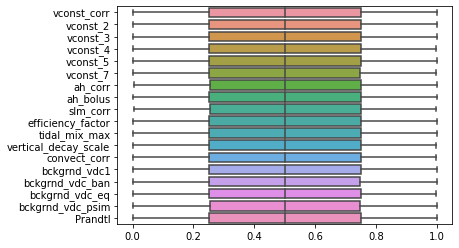

In [868]:
sns.boxplot(data = climate_data, orient='h') 

**Remark**: The raw data has no outlier

<AxesSubplot:>

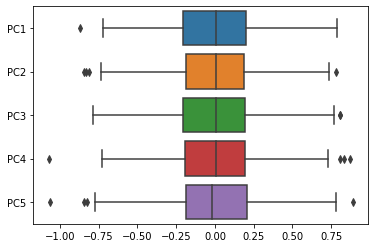

In [869]:
sns.boxplot(data = pc5_data, orient='h')

**Remark**: The new data has some outliers

### Exclude the unusual observations and refit the PCA model.

#### Exclude the data points which is out of Q1-1.5 IQR and Q3+1.5 IQR

Exclude the outliers

In [870]:
Q1 = pc5_data.quantile(0.25)
Q3 = pc5_data.quantile(0.75)
IQR = Q3 - Q1

In [871]:
IQR

PC1    0.405024
PC2    0.373369
PC3    0.398420
PC4    0.387234
PC5    0.395221
dtype: float64

Excluded data

In [872]:
pc5_data_e = pc5_data[((pc5_data < (Q1 - 1.5 * IQR)) |(pc5_data > (Q3 + 1.5 * IQR))).any(axis=1)]
pc5_data_e.shape

(15, 5)

In [873]:
data_e = np.dot(pc5_data_e, eigvecs5)
data_e = pd.DataFrame(data_e)
data_e.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.524969,-0.223488,-0.110554,0.005717,-0.330112,0.425812,0.091179,0.003237,0.103264,0.139425,-0.124193,-0.100762,-0.342680,0.436103,0.078146,0.399875,-0.196538,-0.122825
1,0.039344,-0.180006,-0.365384,-0.187984,0.319876,-0.083255,0.136876,-0.220704,0.285689,-0.082474,0.253289,0.111139,-0.351294,0.147404,-0.419806,0.127010,0.215765,0.158258
2,0.461366,0.094716,-0.145978,-0.432873,0.253273,-0.002621,-0.065578,0.014988,0.080662,-0.248932,0.448173,0.288029,-0.384846,0.016071,-0.059362,-0.229798,-0.268954,0.355410
3,-0.148481,0.005784,0.484902,0.517422,-0.146968,-0.054427,-0.250375,0.012356,-0.040815,0.112896,-0.002463,-0.053010,0.236041,-0.348686,0.312664,0.064386,-0.202240,-0.170755
4,-0.221676,-0.139977,0.076474,0.116480,-0.047614,0.204486,-0.052100,-0.020395,0.243264,0.068476,0.377694,0.080768,-0.452185,0.162914,0.100931,0.288527,-0.460784,0.084418


In [874]:
data_e.shape

(15, 18)

Outliers-excluded data

In [875]:
pc5_data_o = pc5_data[~((pc5_data < (Q1 - 1.5 * IQR)) | (pc5_data > (Q3 + 1.5 * IQR))).any(axis=1)]
pc5_data_o.shape

(525, 5)

In [876]:
data_o = np.dot(pc5_data_o, eigvecs5)
data_o = pd.DataFrame(data_o)
pc5_data_n = np.dot(data_o,eigvecs5.T)
pc5_data_n = pd.DataFrame(pc5_data_n, columns=['PC1','PC2','PC3','PC4','PC5'])
pc5_data_n  

,PC1,PC2,PC3,PC4,PC5
0,-0.520484,-0.058989,-0.058510,-0.375772,-0.181845
1,0.142767,0.052349,-0.356005,-0.115304,-0.356777
2,0.271397,0.234852,-0.288193,-0.112353,-0.110374
3,-0.292848,0.180928,0.001495,0.240951,-0.209116
4,0.115026,0.207788,-0.091717,-0.123898,0.183074
...,...,...,...,...,...
520,-0.421092,0.250383,0.021019,-0.127822,-0.033957
521,-0.165207,-0.628876,-0.239307,-0.504136,0.006123
522,0.629125,0.042647,0.052430,-0.093430,0.367859
523,0.364317,-0.169336,-0.172248,-0.149197,0.327107


### After exclude the outliers:

In [877]:
pc5_data_n.corr()

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000,0.000393,-0.004700,-0.011935,-0.002580
PC2,0.000393,1.000000,0.011510,-0.007114,-0.007397
PC3,-0.004700,0.011510,1.000000,0.028533,-0.018330
PC4,-0.011935,-0.007114,0.028533,1.000000,-0.004839
PC5,-0.002580,-0.007397,-0.018330,-0.004839,1.000000


In [878]:
pc5_data_n.cov()

,PC1,PC2,PC3,PC4,PC5
PC1,0.084844,0.000032,-0.000384,-0.000974,-0.000209
PC2,0.000032,0.075995,0.000890,-0.000550,-0.000568
PC3,-0.000384,0.000890,0.078758,0.002245,-0.001433
PC4,-0.000974,-0.000550,0.002245,0.078577,-0.000378
PC5,-0.000209,-0.000568,-0.001433,-0.000378,0.077552


Remark: Some change in corelation and covariance

### Eigenvalues and Eigenvectors:

In [879]:
eigvals, eigvecs = la.eig(data_o.cov())
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs [:,idx]

print("Eigenvalues: ", eigvals)
print("Eigenvectors: ", eigvecs)

Eigenvalues:  [ 8.50835194e-02+0.00000000e+00j  8.12469629e-02+0.00000000e+00j
  7.78946546e-02+0.00000000e+00j  7.63419964e-02+0.00000000e+00j
  7.51589138e-02+0.00000000e+00j  7.01943909e-18+1.41069116e-18j
  7.01943909e-18-1.41069116e-18j  3.73868475e-18+2.09812532e-18j
  3.73868475e-18-2.09812532e-18j  1.34542727e-18+0.00000000e+00j
 -4.62765251e-19+2.03858138e-18j -4.62765251e-19-2.03858138e-18j
 -4.10907864e-18+0.00000000e+00j -6.24493712e-18+5.14655677e-18j
 -6.24493712e-18-5.14655677e-18j -6.58294337e-18+0.00000000e+00j
 -9.09355015e-18+0.00000000e+00j -1.59564732e-17+0.00000000e+00j]
Eigenvectors:  [[-7.67921213e-02+0.j         -1.33568810e-02+0.j
   5.61244555e-01+0.j          6.90912306e-02+0.j
   8.32350246e-03+0.j         -1.32873483e-01-0.09592756j
  -1.32873483e-01+0.09592756j -8.98920441e-02+0.03336209j
  -8.98920441e-02-0.03336209j -1.74008816e-01+0.j
  -2.09486449e-02-0.08022393j -2.09486449e-02+0.08022393j
   1.39493050e-01+0.j         -5.77513342e-02-0.03713842j
  -

#### Score after extract

In [880]:
component_score = (eigvals[0] + eigvals[1]) / sum(eigvals)
component_score

(0.4203172460715486+0j)

**Remark**: increase score when exclude the outliers

## Part 3

### Use sklearn.decomposition to build a PCA model on all the data


5 Components

In [881]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pc_data = pca.fit_transform(climate_data)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_ 

print("Eigenvalues:", eigenvalues)
print("Eigenvectors", eigenvectors)

Eigenvalues: [0.08980104 0.08851934 0.08764946 0.08692666 0.08588208]
Eigenvectors [[-0.18411011  0.22902173  0.09321711  0.13509102  0.02446986 -0.24101871
  -0.27021975  0.39972778 -0.14282744 -0.36597055  0.32844867 -0.37511889
  -0.3327861   0.08765942  0.20959577  0.12019115  0.12319377 -0.01769455]
 [ 0.44040672  0.06824839  0.34061588 -0.38781868 -0.12745894 -0.19472039
   0.28534391  0.09468068 -0.13896449  0.13060936 -0.2408447  -0.14779364
  -0.28720827 -0.18589803 -0.02665644  0.36783943  0.11014919 -0.09486408]
 [-0.1225948  -0.18465122  0.06992442  0.12449028 -0.29451505  0.07879604
   0.33826361 -0.44899886 -0.01771201 -0.39210898 -0.15924804 -0.05832858
  -0.23162739  0.46724414  0.1491573   0.03171497  0.18785169 -0.09045089]
 [ 0.17393743 -0.36862303  0.26921212  0.37769249  0.27739179  0.32371333
  -0.18146842  0.20772842  0.14716326  0.17913571 -0.22817695 -0.12723195
  -0.26455319  0.24627306 -0.09577408  0.15889045 -0.087789    0.25720373]
 [-0.14324984  0.01016397

In [882]:
pc_data_5 = pd.DataFrame(pc_data,columns=['PC1','PC2','PC3','PC4','PC5'])
pc_data_5

,PC1,PC2,PC3,PC4,PC5
0,-0.348693,0.168645,-0.095148,-0.223784,0.494268
1,-0.174712,-0.391423,-0.367261,0.064681,0.042182
2,-0.525430,-0.125111,0.104499,0.096493,-0.289927
3,0.177397,-0.056312,0.154574,0.213575,0.055332
4,0.072220,-0.433229,-0.361629,-0.091665,-0.379901
...,...,...,...,...,...
535,-0.435598,-0.090148,0.240379,-0.429493,0.115377
536,-0.280345,0.694515,-0.188336,-0.285292,0.204173
537,0.484103,0.145846,0.088578,-0.113295,-0.086791
538,-0.298455,-0.378330,0.049211,0.074083,-0.264190


### Correlation after PCA

In [883]:
pc_data_5.corr()

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000e+00,4.265326e-16,1.326271e-16,1.879637e-17,-4.207183e-17
PC2,4.265326e-16,1.000000e+00,1.213070e-17,-1.015575e-16,-3.071104e-17
PC3,1.326271e-16,1.213070e-17,1.000000e+00,3.111952e-16,-3.302941e-16
PC4,1.879637e-17,-1.015575e-16,3.111952e-16,1.000000e+00,5.174620e-16
PC5,-4.207183e-17,-3.071104e-17,-3.302941e-16,5.174620e-16,1.000000e+00


### Covariance after PCA

In [884]:
pc_data_5.cov()

,PC1,PC2,PC3,PC4,PC5
PC1,8.980104e-02,3.551838e-17,1.230720e-17,2.729212e-18,-2.677718e-18
PC2,3.551838e-17,8.851934e-02,-1.544837e-18,-7.003262e-18,-1.853805e-18
PC3,1.230720e-17,-1.544837e-18,8.764946e-02,2.585028e-17,-2.899145e-17
PC4,2.729212e-18,-7.003262e-18,2.585028e-17,8.692666e-02,4.531523e-17
PC5,-2.677718e-18,-1.853805e-18,-2.899145e-17,4.531523e-17,8.588208e-02


10 Component

In [885]:
pca = PCA(n_components=10)
pc_data_10 = pca.fit_transform(climate_data)

In [886]:
pc_data_10=pd.DataFrame(pc_data_10, columns=['PC1','PC2','PC3','PC4','PC5','PC6','Pc7', 'PC8','PC9','PC10'])
pc_data_10

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7,PC8,PC9,PC10
0,-0.321017,-0.467738,-0.182665,-0.239396,0.043777,0.370279,0.575636,0.414773,-0.266682,0.254126
1,0.377809,-0.001630,-0.398625,0.099443,-0.033156,-0.189865,0.372507,0.365044,-0.075798,-0.350728
2,0.613601,-0.250771,0.217231,0.025563,-0.250886,0.025568,0.057071,-0.183311,-0.230075,-0.428648
3,-0.158009,0.155082,-0.042259,-0.125506,0.286959,-0.125178,0.491117,-0.084386,0.067561,-0.501738
4,0.420834,0.241696,-0.307160,0.179551,-0.379466,-0.213944,0.398670,0.033781,0.333025,-0.047408
...,...,...,...,...,...,...,...,...,...,...
535,-0.009259,-0.427238,-0.048317,-0.566119,-0.152730,0.130967,0.323555,0.039597,-0.140664,0.235611
536,-0.310155,-0.446941,0.210365,0.214778,-0.292756,0.293311,0.015072,0.476042,0.360985,-0.421858
537,-0.175448,0.486544,0.235348,0.002358,-0.243055,0.102801,-0.212177,0.142481,-0.365910,0.141627
538,0.610129,0.014330,0.276236,0.020981,-0.285829,-0.258490,-0.006125,0.568654,-0.195820,0.201923


### Correlation after PCA

In [887]:
pc_data_10.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7,PC8,PC9,PC10
PC1,1.000000e+00,-2.611088e-16,-1.314108e-17,-2.060390e-16,-4.124763e-16,2.715701e-16,-1.033034e-16,3.298120e-16,6.934313e-18,2.788680e-16
PC2,-2.611088e-16,1.000000e+00,-8.966178e-17,-2.693552e-16,-4.555462e-16,1.410336e-16,2.496113e-17,4.943987e-17,-2.061132e-16,3.488883e-16
PC3,-1.314108e-17,-8.966178e-17,1.000000e+00,-6.595154e-18,-3.305921e-16,-1.233590e-16,-1.140042e-16,-4.438944e-17,2.913984e-16,5.780268e-16
PC4,-2.060390e-16,-2.693552e-16,-6.595154e-18,1.000000e+00,1.032502e-16,-4.137408e-17,1.962533e-17,9.908663e-18,-3.128001e-16,-1.857625e-16
PC5,-4.124763e-16,-4.555462e-16,-3.305921e-16,1.032502e-16,1.000000e+00,-2.914647e-16,-3.615475e-16,1.498931e-16,-2.534707e-16,-1.523945e-16
PC6,2.715701e-16,1.410336e-16,-1.233590e-16,-4.137408e-17,-2.914647e-16,1.000000e+00,3.501498e-16,-6.103588e-16,-5.577921e-16,-6.379042e-17
Pc7,-1.033034e-16,2.496113e-17,-1.140042e-16,1.962533e-17,-3.615475e-16,3.501498e-16,1.000000e+00,2.451606e-16,4.403920e-17,-4.686290e-16
PC8,3.298120e-16,4.943987e-17,-4.438944e-17,9.908663e-18,1.498931e-16,-6.103588e-16,2.451606e-16,1.000000e+00,-2.902979e-16,6.865564e-16
PC9,6.934313e-18,-2.061132e-16,2.913984e-16,-3.128001e-16,-2.534707e-16,-5.577921e-16,4.403920e-17,-2.902979e-16,1.000000e+00,8.547243e-16
PC10,2.788680e-16,3.488883e-16,5.780268e-16,-1.857625e-16,-1.523945e-16,-6.379042e-17,-4.686290e-16,6.865564e-16,8.547243e-16,1.000000e+00


### Covariance after PCA

In [888]:
pc_data_10.cov()

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7,PC8,PC9,PC10
PC1,9.010916e-02,-2.301807e-17,-1.029891e-18,-1.956794e-17,-3.728207e-17,2.389348e-17,-9.886958e-18,2.896570e-17,0.000000e+00,2.615924e-17
PC2,-2.301807e-17,8.984972e-02,-9.166034e-18,-2.368750e-17,-3.975381e-17,1.143180e-17,3.501631e-18,7.054757e-18,-1.853805e-17,2.996984e-17
PC3,-1.029891e-18,-9.166034e-18,8.819722e-02,6.179349e-19,-2.842501e-17,-1.143180e-17,-8.033154e-18,-3.089674e-18,2.358452e-17,4.943479e-17
PC4,-1.956794e-17,-2.368750e-17,6.179349e-19,8.748292e-02,1.009294e-17,-2.677718e-18,3.295653e-18,4.119566e-19,-2.904294e-17,-1.616930e-17
PC5,-3.728207e-17,-3.975381e-17,-2.842501e-17,1.009294e-17,8.657826e-02,-2.430544e-17,-2.966087e-17,1.122582e-17,-2.265761e-17,-1.158628e-17
PC6,2.389348e-17,1.143180e-17,-1.143180e-17,-2.677718e-18,-2.430544e-17,8.537507e-02,3.015007e-17,-5.211251e-17,-4.881686e-17,-5.561414e-18
Pc7,-9.886958e-18,3.501631e-18,-8.033154e-18,3.295653e-18,-2.966087e-17,3.015007e-17,8.505451e-02,2.203968e-17,2.883696e-18,-3.887840e-17
PC8,2.896570e-17,7.054757e-18,-3.089674e-18,4.119566e-19,1.122582e-17,-5.211251e-17,2.203968e-17,8.468789e-02,-2.574729e-17,5.656679e-17
PC9,0.000000e+00,-1.853805e-17,2.358452e-17,-2.904294e-17,-2.265761e-17,-4.881686e-17,2.883696e-18,-2.574729e-17,8.449341e-02,7.065056e-17
PC10,2.615924e-17,2.996984e-17,4.943479e-17,-1.616930e-17,-1.158628e-17,-5.561414e-18,-3.887840e-17,5.656679e-17,7.065056e-17,8.382111e-02


In [889]:
component_score = (eigenvalues[0] + eigenvalues[1]) / sum(eigenvalues)
component_score

0.40640174398696005

### Plot the scores for the first two components

5 components

<AxesSubplot:>

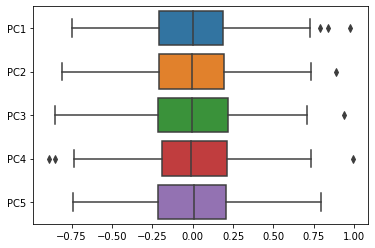

In [890]:
sns.boxplot(data=pc_data_5, orient='h')

10 components

<AxesSubplot:>

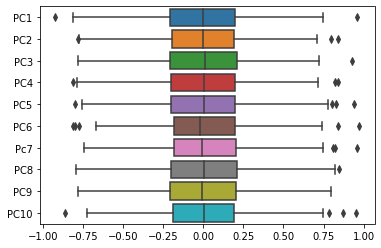

In [891]:
sns.boxplot(data=pc_data_10, orient='h')

### New Excluded-outliers Data after PCA

In [892]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pc_data=pca.fit_transform(data_o)

In [893]:
pc_data=pd.DataFrame(pc_data,columns=['PC1','PC2','PC3','PC4','PC5'])
pc_data

,PC1,PC2,PC3,PC4,PC5
0,-0.429498,-0.292870,0.368808,0.099758,-0.190091
1,0.203540,-0.150201,0.244446,0.372315,0.168242
2,0.321500,-0.143936,0.170205,0.081321,0.273272
3,-0.332802,0.173439,0.083236,0.128809,0.239886
4,0.148278,-0.150840,0.033839,-0.209281,0.143143
...,...,...,...,...,...
520,-0.388571,-0.099612,0.258356,-0.125229,0.115558
521,-0.035977,-0.547003,0.023687,0.280159,-0.595547
522,0.625316,-0.009543,-0.199560,-0.330600,-0.032066
523,0.406265,-0.262182,-0.239877,-0.108082,-0.117860


In [894]:
pc_data.corr()

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000e+00,6.307073e-17,-1.546902e-16,1.314451e-17,1.258518e-17
PC2,6.307073e-17,1.000000e+00,-8.123092e-17,-2.173222e-17,9.049121e-17
PC3,-1.546902e-16,-8.123092e-17,1.000000e+00,4.675104e-17,3.876706e-17
PC4,1.314451e-17,-2.173222e-17,4.675104e-17,1.000000e+00,2.127539e-16
PC5,1.258518e-17,9.049121e-17,3.876706e-17,2.127539e-16,1.000000e+00


In [895]:
pc_data.cov()

,PC1,PC2,PC3,PC4,PC5
PC1,8.508352e-02,6.064911e-18,-1.287138e-17,-3.178119e-19,2.436558e-18
PC2,6.064911e-18,8.124696e-02,-6.144364e-18,-1.059373e-18,7.097800e-18
PC3,-1.287138e-17,-6.144364e-18,7.789465e-02,4.283840e-18,4.237492e-19
PC4,-3.178119e-19,-1.059373e-18,4.283840e-18,7.634200e-02,1.644677e-17
PC5,2.436558e-18,7.097800e-18,4.237492e-19,1.644677e-17,7.515891e-02
